In [ ]:
#2. Find the most popular tweets in your collection of tweets
#plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
#With Graph

***** PRINTING TOP 10 popular Tweet *****
Analysing Data from File - condolence.json
Total Tweets - 90010
Analysing Data from File - R_I_P.json
Total Tweets - 90000
Analysing Data from File - RIP.json
Total Tweets - 90001
Analysing Data from File - restInPeace.json
Total Tweets - 90000


,ID,Text,Retweet_CT,user,tweet_createDt
0,499042364846268416,One of my all time favourites. Movies I grew up watching over and over again. A genius that will be so missed.\n\nR.I.P. Robin Williams.,224858,Harry_Styles,Tue Aug 12 03:59:06 +0000 2014
1,686463476236169216,RIP David Bowie. A music Legend !,156595,Louis_Tomlinson,Mon Jan 11 08:23:41 +0000 2016
2,686496322367565824,RIP. David Bowie. An icon. https://t.co/YI7NSxLitg,132169,Harry_Styles,Mon Jan 11 10:34:12 +0000 2016
3,689351152001941504,One of the greatest ever. He will be missed by so many. Rest in love and peace Mr. Frey. https://t.co/JbNgE161KG,98726,Harry_Styles,Tue Jan 19 07:38:16 +0000 2016
4,693958521453481985,Real loss to the world today the man with the golden voice terry Wogan you will be sorely missed rip,91196,Real_Liam_Payne,Mon Feb 01 00:46:19 +0000 2016
5,695666864400171008,Just posted a photo https://t.co/MiyUJFn1yl,71238,Harry_Styles,Fri Feb 05 17:54:39 +0000 2016
6,553615190311591936,R.I.P. 🙌😔 http://t.co/vSOkkn7Foa,55214,drvgtrvll,Fri Jan 09 18:12:01 +0000 2015
7,599868813656621057,P O W E R I N G U P \n\nrrrrr..r.rrrrRRRREEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE http://t.co/KlHRVM474i,45163,shibesbot,Sun May 17 09:27:24 +0000 2015
8,666696733951438848,R.i.p to televisions best two uncles 🙌🙏 https://t.co/fawkarQYW2,26686,bbymidd,Tue Nov 17 19:17:42 +0000 2015
9,687681163301761024,no no no Alan Rickman :'(((((((((((((((((((((((((((((((((((((((( rest in peace :(,24691,ArianaGrande,Thu Jan 14 17:02:20 +0000 2016


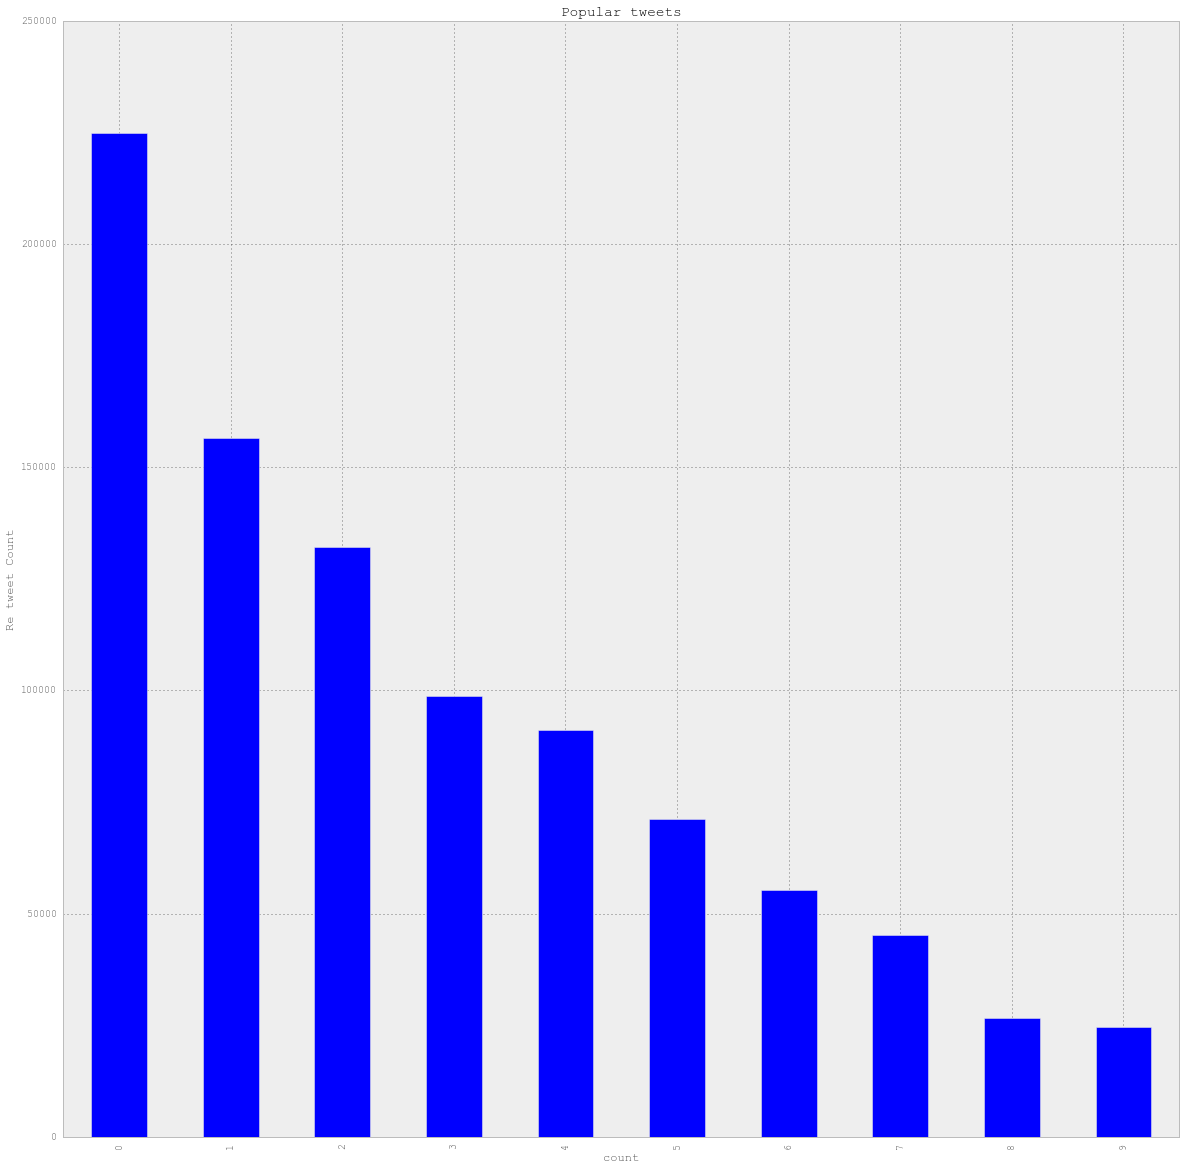

In [17]:
%matplotlib inline
import json
import pandas as pd
from IPython.display import display
from collections import Counter
import matplotlib.pyplot as plt
import re

global Master_List 
Master_List = []
pd.set_option('display.mpl_style', 'default') #Pretty print graph

def get_rip_tweets_info():
    #Create a instance of Panda Dataframe
    sn = []
    for status in tweets_data:
        sn_tweet = ()
        for user_mention in status['entities']['user_mentions']:
            sn_tweet = sn_tweet +(user_mention['screen_name'],)
        sn.append((sn_tweet))

    #print sn
    #print "total SN : " + str(len(sn))
    DataSet = pd.DataFrame()    
    DataSet['tweet_ID'] = [status["id_str"] for status in tweets_data]
    DataSet['Retweet_CT'] =  [status["retweet_count"] for status in tweets_data]
    DataSet['tweet_Text'] =  [status["text"] for status in tweets_data]
    DataSet['tweet_lang'] =  [status["text"] for status in tweets_data]
    DataSet['tweet_createdDt'] =  [status["created_at"] for status in tweets_data]
    DataSet['Suspect_List'] =  [name for name in sn]
    DataSet['user_id'] =  [status["user"]["id_str"] for status in tweets_data]
    DataSet['user_SN'] =  [status["user"]["screen_name"] for status in tweets_data]
    DataSet['user_location'] =  [status["user"]["location"] for status in tweets_data]
    DataSet['user_TimeZone'] =  [status["user"]["time_zone"] for status in tweets_data]
    DataSet['user_frn_ct'] =  [status["user"]["friends_count"] for status in tweets_data]
    DataSet['user_fol_ct'] =  [status["user"]["followers_count"] for status in tweets_data]
    print "Display top 20"
    display(DataSet.head(20))


def plot_graph(frames):
    # Create a bar-graph figure of the specified size
    result = pd.concat(frames)
    pd.set_option('display.max_colwidth', 1000)
    result.sort_values(['Retweet_CT'], ascending=[False],inplace=True)
    result = result.reset_index(drop=True)
    display(result.head(10))
    plt.figure(figsize=(20,20))
    rt = result['Retweet_CT'][:10]
    my_xticks = result['user'][:10]
    plt.xticks(rt, my_xticks)    
    rt.plot(kind='bar')
    # Assign labels and title to the graph to make it more presentable
    plt.xlabel('count')
    plt.ylabel('Re tweet Count')
    plt.title('Popular tweets')


def get_popular_tweet(tweets_data):
    #Create a instance of Panda Dataframe
    nonRT_dict = []
    rt_dict = {}
    for status in tweets_data:
        if "retweeted_status" in status.keys():
            # check if this tweet is already retweeted
            if status["retweeted_status"]["id_str"] in rt_dict.keys():
                #check if this is the max re tweet value
                if rt_dict[status["retweeted_status"]["id_str"]][1] > status["retweeted_status"]["retweet_count"]:
                    continue #ignore as the max tweet count is regestered.
                else:
                    #register the  tweet with new max value.
                    rt_dict[status["retweeted_status"]["id_str"]] = (status["retweeted_status"]["text"],
                                                                     status["retweeted_status"]["retweet_count"],
                                                                     status["retweeted_status"]["user"]["screen_name"],
                                                                     status["retweeted_status"]["created_at"])
            else:
                rt_dict[status["retweeted_status"]["id_str"]] = (status["retweeted_status"]["text"],
                                                                 status["retweeted_status"]["retweet_count"],
                                                                 status["retweeted_status"]["user"]["screen_name"],
                                                                 status["retweeted_status"]["created_at"])
        else:
            nonRT_dict.append(status)
                
        
    DataSet = pd.DataFrame()    
    DataSet['ID'] = [id for id in rt_dict.keys()]
    DataSet['Text'] =  [rt_dict[id][0] for id in rt_dict.keys()]
    DataSet['Retweet_CT'] = [rt_dict[id][1] for id in rt_dict.keys()]
    DataSet['user'] = [rt_dict[id][2] for id in rt_dict.keys()]
    DataSet['tweet_createDt'] = [rt_dict[id][3] for id in rt_dict.keys()]
    return DataSet
    
fls = ['condolence.json','R_I_P.json','RIP.json','restInPeace.json']
RT_tweets = []
total_tweets = 0
frames = []
print "***** PRINTING TOP 10 popular Tweet *****"
for f in fls:    
    tweets_data = []
    print "Analysing Data from File - " + f
    tweets_data_path = f #'condolence.json'    
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)        
            tweets_data.append(tweet)
        except:
            continue
    total_tweets += len(tweets_data)
    print "Total Tweets - " + str(len(tweets_data))    
    ds = get_popular_tweet(tweets_data)
    frames.append(ds)
plot_graph(frames)
